In [2]:
import numpy as np
import math as math
from iminuit import Minuit, describe, Struct
import matplotlib.pylab as plt
%matplotlib  notebook



In [52]:
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))


In [101]:
def calc_pull(iterations):
    pull_mean_list=[]
    pull_width_list=[]
    average_best_mean=0
    average_best_width=0
    
    means = []
    widths = []
    fit_means = []
    fit_widths = []
    
    fit_means_uncert = []
    fit_widths_uncert = []

    for num in range(iterations):

        Nstudents = np.random.poisson(200)
        #rand_mean = 120 #np.random.normal(80)
        #rand_width = 4 #np.random.normal(4)
        rand_mean = np.random.normal(80,1)
        rand_width = np.random.normal(4,0.2)

        scores = np.random.normal(rand_mean,rand_width,Nstudents)

        means.append(rand_mean)
        widths.append(rand_width)
        
        
        def Gaussian(mean,width):
            x = scores
            y = (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))
            return -np.log(y).sum()
    
 
        m=Minuit(Gaussian, mean=80, error_mean=0.1, limit_mean=(0.1,200.), width= 2, error_width=0.1, limit_width=(0.01,10), errordef = 0.5,fix_width=False, print_level=0)
        m.migrad()
        param=m.values.values()
        err=m.errors.values()
        
        fit_means.append(param[1])
        fit_widths.append(param[0])

        fit_means_uncert.append(err[1])
        fit_widths_uncert.append(err[0])
        
        pull_width=(rand_width-param[0])/err[0]
        pull_mean=(rand_mean-param[1])/err[1]
        pull_mean_list.append(pull_mean)
        pull_width_list.append(pull_width)
        
        average_best_mean+=param[1]
        average_best_width+=param[0]
        
    return [pull_mean_list,pull_width_list],[means,widths],[fit_means,fit_widths],[fit_means_uncert,fit_widths_uncert]
        


In [102]:
pulls,org_vals,fit_vals,fit_uncerts = calc_pull(10000)

In [103]:
#print pulls[1]

<IPython.core.display.Javascript object>


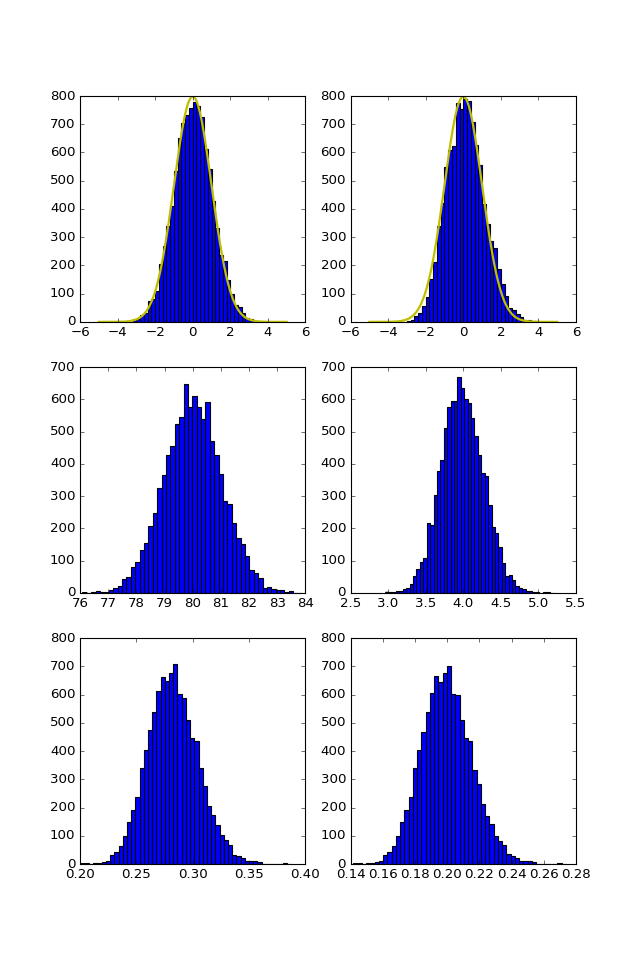

(array([   1.,    4.,    1.,    2.,    4.,    7.,   12.,   33.,   42.,
          65.,   98.,  147.,  192.,  237.,  340.,  404.,  468.,  539.,
         607.,  666.,  644.,  678.,  701.,  602.,  600.,  511.,  447.,
         434.,  332.,  283.,  212.,  169.,  143.,  100.,   82.,   69.,
          35.,   28.,   20.,   11.,    9.,    9.,    7.,    0.,    1.,
           0.,    1.,    0.,    2.,    1.]),
 array([ 0.14181315,  0.14445077,  0.14708839,  0.149726  ,  0.15236362,
         0.15500124,  0.15763886,  0.16027647,  0.16291409,  0.16555171,
         0.16818932,  0.17082694,  0.17346456,  0.17610218,  0.17873979,
         0.18137741,  0.18401503,  0.18665265,  0.18929026,  0.19192788,
         0.1945655 ,  0.19720312,  0.19984073,  0.20247835,  0.20511597,
         0.20775358,  0.2103912 ,  0.21302882,  0.21566644,  0.21830405,
         0.22094167,  0.22357929,  0.22621691,  0.22885452,  0.23149214,
         0.23412976,  0.23676737,  0.23940499,  0.24204261,  0.24468023,
         0.24731

In [104]:
plt.figure(figsize=(8,12))
plt.subplot(3,2,1)
plt.hist(pulls[0],bins=50,range=(-5,5))
x = np.linspace(-5,5,1000)
y=normal(x,0,1)
plt.plot(x,2000*y,'y-',linewidth=2)

plt.subplot(3,2,2)
plt.hist(pulls[1],bins=50,range=(-5,5))    
plt.plot(x,2000*y,'y-',linewidth=2)


plt.subplot(3,2,3)
plt.hist(fit_vals[0],bins=50)
plt.subplot(3,2,4)
plt.hist(fit_vals[1],bins=50)    

plt.subplot(3,2,5)
plt.hist(fit_uncerts[0],bins=50)
plt.subplot(3,2,6)
plt.hist(fit_uncerts[1],bins=50)    



#x = np.linspace(-5,5,1000)
#y=normal(x,0,1)
#plt.plot(x,y)


In [106]:
print min(org_vals[1])

3.21358835118


In [108]:
print np.mean(pulls[1])
print np.mean(pulls[1])*np.mean(fit_uncerts[1])

0.123266947352
0.0246045464036


In [110]:
print np.mean(fit_vals[1])

3.98505278537


In [111]:
print np.mean(fit_vals[0])

80.0034556366
